0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.00500878275844545
0.07090964700870064/pi + 0.016779217441775046 703878.3698176955 0.0050087827

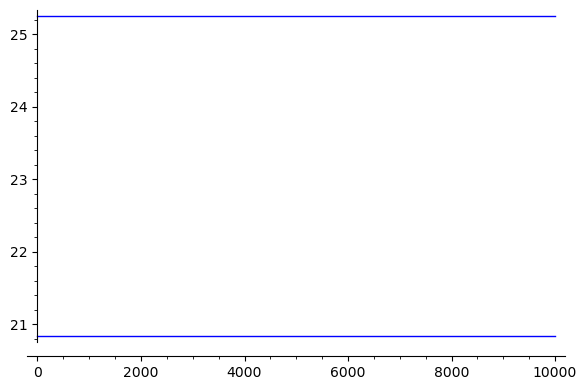

In [1]:
import traceback
import warnings
import sys

def warn_with_traceback(message, category, filename, lineno, file=None, line=None):

    log = file if hasattr(file,'write') else sys.stderr
    traceback.print_stack(file=log)
    log.write(warnings.formatwarning(message, category, filename, lineno, line))

warnings.showwarning = warn_with_traceback

if 'thesis.Aircraft' in sys.modules: del sys.modules['thesis.Aircraft']
from thesis.Aircraft import Aircraft

craft = Aircraft(mass = 10)

list_plot([
    (h, craft.straightPower(θ = 0, α = 5, a = 0, h=h).n())
    for h in [0,1000,2000,3000,4000,5000,6000,7000,8000,10000]
], plotjoined=True) + \
list_plot([
    (h, craft.turningPower(r=10, α=5, h=h).n())
    for h in [0,1000,2000,3000,4000,5000,6000,7000,8000,10000]
], plotjoined=True)

#craft.turningPower(r=50, α=5, h=1000)

In [15]:
import math

dz = 60
length_horizontal = 3000
rad2deg = 180 / math.pi
alpha = 5

tilt = -(math.atan2(dz, length_horizontal) * rad2deg + alpha)

tilt

-6.145762838175103

In [51]:
import pandas as pd
import pvlib

altitude = 1000

#times = pd.date_range(start = '2020-11-28T08', end = '2020-11-30T08', freq='30S', tz='America/Detroit')


tz, name = 'America/Detroit', 'Michigan'
times = pd.date_range(start = '2020-11-28T08', end = '2020-11-28T13', freq='30S', tz='America/Detroit')
loc = pvlib.location.Location(36, -84, tz, altitude, name)

# Compute solar position parameters for each timeslot
ephem_data = loc.get_solarposition(times)
# Compute irradiation data for each timeslot
irrad_data = loc.get_clearsky(times)
# Extraterrestrial radiation value
dni_et = pvlib.irradiance.get_extra_radiation

# Sun position
sun_zenith = ephem_data['apparent_zenith']
sun_azimuth = ephem_data['azimuth']

# Air mass
AM = pvlib.atmosphere.get_relative_airmass(sun_zenith)

surf_tilt = -5#pose['tilt']
surf_azimuth = 0#pose['azimuth']

pts = [(surf_tilt*10, surf_azimuth,
pvlib.irradiance.get_total_irradiance(
    surf_tilt, surf_azimuth,
    sun_zenith, sun_azimuth,
    dni = irrad_data['dni'], ghi = irrad_data['ghi'], dhi = irrad_data['dhi'],
    dni_extra = dni_et,
    model = 'klucher'
).poa_global.max())
 for surf_tilt in range(-10, 10)
 for surf_azimuth in range(0, 360, 10)
]

#list_plot3d(pts)

In [145]:
tz, name = 'America/Detroit', 'Michigan'
times = pd.date_range(start = '2020-11-28T08', end = '2020-11-28T13', freq='30S', tz='America/Detroit')
loc = pvlib.location.Location(36, -84, tz, 9000, name)

# Compute solar position parameters for each timeslot
ephem_data = loc.get_solarposition(times)
# Compute irradiation data for each timeslot
irrad_data = loc.get_clearsky(times)
# Extraterrestrial radiation value
dni_et = pvlib.irradiance.get_extra_radiation

# Sun position
sun_zenith = ephem_data['apparent_zenith']
sun_azimuth = ephem_data['azimuth']

# Air mass
AM = pvlib.atmosphere.get_relative_airmass(sun_zenith)

surf_tilt = -5#pose['tilt']
surf_azimuth = 0#pose['azimuth']

pvlib.irradiance.get_total_irradiance(
    surf_tilt, surf_azimuth,
    sun_zenith, sun_azimuth,
    dni = irrad_data['dni'], ghi = irrad_data['ghi'], dhi = irrad_data['dhi'],
    dni_extra = dni_et,
    model = 'klucher'
).poa_global.max()

1068.3884526704912

In [130]:
# Airmass absolute goes from 1.657 to 0.567 1000->10000
pvlib.clearsky.ineichen(57, 0.5, 1, 10000)

OrderedDict([('ghi', 961.748734039637), ('dni', 1681.7109304184062), ('dhi', 45.82331572233295)])